In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
sParamDir='../data/sParameters/'
impedDir='../data/impedances/'

In this note I compare simulations of different feedline geometries for the CTP feed on HERA. 

In [2]:
def loadS11_cst(fbase,autoPath=True):
    if(autoPath):
        sDir=sParamDir
    else:
        sDir=''
    try:
        amp=np.loadtxt(sDir+fbase+'_amp.txt',skiprows=2)
    except Exception as err:
        print err
        amp=np.loadtxt(sDir+fbase+'_abs.txt',skiprows=2)


    frq=amp[:,0]
    amp=10.**(amp[:,1]/20.)
    try:
        pha=np.radians(np.loadtxt(sParamDir+fbase+'_pha.txt',skiprows=2)[:,1])
    except:
        pha=np.zeros(len(amp))
    return frq,amp*np.exp(1j*pha)


def loadZ_cst(fbase,autoPath=True):
    if(autoPath):
        sDir=impedDir
    else:
        sDir=''

    realpart=np.loadtxt(sDir+fbase+'_re.txt',skiprows=2)
    imagpart=np.loadtxt(sDir+fbase+'_im.txt',skiprows=2)


    frq=realpart[:,0]
    return frq,realpart[:,1]+imagpart[:,1]*1j



def s112z(s11,zr):
    return zr*(1+s11)/(1-s11) 
def changeImpedance(s11,zi,zf):
    za=s112z(s11,zi)
    return (za-zf)/(zf+za)
def fromVNAHP(filename):
    data=np.loadtxt(filename,skiprows=9,delimiter=',')
    return data[:,0]+1j*data[:,1]

First, we load reflection coefficients, $S_{11}$, and impedances $Z$, of feeds with different geometries. These include a model with rectangular feedline posts 0.677 inches with center-center spacing varied by 0.854 inches and 0.9375 inches. The simulation used to generate this geometry was \it $Cosmic\_Twilight\_Polarimeter\_vary\_feedline_spacing.cst$. 

In [3]:
#load S11
freqs,s11_CTP_spacing_0p854=loadS11_cst('CPT_vary_feedline_spacing_0p854_s11')
_,s11_CTP_spacing_0p9375=loadS11_cst('CPT_vary_feedline_spacing_0p9375_s11')
#load impedance
_,z_CTP_spacing_0p854=loadZ_cst('CPT_vary_feedline_spacing_0p854_z')
_,z_CTP_spacing_0p9375=loadZ_cst('CPT_vary_feedline_spacing_0p9375_z')

Next we load reflection coefficients and impedances for a feed with with the square feed-lines replaced with circular feed-lines whose cross-sectional dimensions match that of the PAPER dipole. The simulation generating these files is $Cosmic\_Twilight\_Polarimeter\_vary\_feedline\_spacing\_circular\_lines.cst$

In [4]:
#load S11
_,s11_CTP_circular=loadS11_cst('CPT_circular_feedlines_s11')
#load impedance
_,z_CTP_circular=loadZ_cst('CPT_circular_feedlines_z')

Finally, we also varied the lengths of the rectangular feedlines while keeping the spacing between them constant at 0.854". The feedline lenghts are 4.1862", 6.9777", and 9.7678" The name of this simulation was $Cosmic\_Twilight\_Polarimeter\_vary\_feedline\_length.cst$

In [5]:
#load S11
freqs,s11_CTP_length_4p1862=loadS11_cst('CPT_vary_feedline_length_4p1862_s11')
_,s11_CTP_length_6p977=loadS11_cst('CPT_vary_feedline_length_6p977_s11')
_,s11_CTP_length_9p7678=loadS11_cst('CPT_vary_feedline_length_9p7678_s11')
#load impedance
_,z_CTP_length_4p1862=loadZ_cst('CPT_vary_feedline_length_4p1862_z')
_,z_CTP_length_6p977=loadZ_cst('CPT_vary_feedline_length_6p977_z')
_,z_CTP_length_9p7678=loadZ_cst('CPT_vary_feedline_length_9p7678_z')

Now lets plot the impact of varying the line spacing

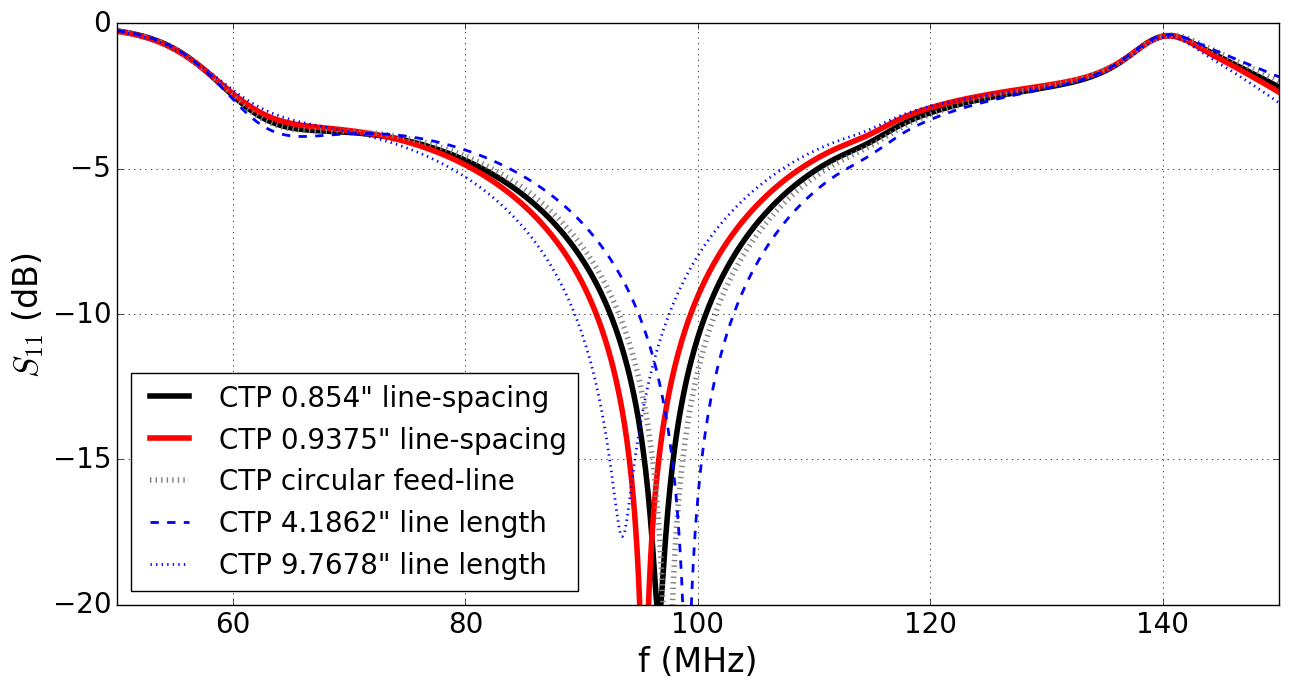

In [6]:
plt.plot(freqs,10.*np.log10(np.abs(s11_CTP_spacing_0p854)),color='k',label='CTP 0.854" line-spacing',lw=4)
plt.plot(freqs,10.*np.log10(np.abs(s11_CTP_spacing_0p9375)),color='r',ls='-',label='CTP 0.9375" line-spacing',lw=4)
plt.plot(freqs,10.*np.log10(np.abs(s11_CTP_circular)),color='grey',ls=':',label='CTP circular feed-line',lw=4)
plt.plot(freqs,10.*np.log10(np.abs(s11_CTP_length_4p1862)),color='b',ls='--',label='CTP 4.1862" line length',lw=2)
#plt.plot(freqs,10.*np.log10(np.abs(s11_CTP_length_6p977)),color='b',ls='-',label='CTP 6.977" line length',lw=2)
plt.plot(freqs,10.*np.log10(np.abs(s11_CTP_length_9p7678)),color='b',ls=':',label='CTP 9.7678" line length',lw=2)



plt.legend(loc='best',fontsize=20)
plt.gca().tick_params(labelsize=20)
plt.xlim(50,150)
plt.gcf().set_size_inches(15,7.5)
plt.gca().set_ylim(-20,0)
plt.grid()
plt.gca().set_ylabel('$S_{11}$ (dB)',fontsize=24)
plt.gca().set_xlabel('f (MHz)',fontsize=24)
plt.savefig('../analysis/CTP_feedline_s11_amp.pdf')


#plt.plot(freqs,5.*np.log10(np.abs(s11CTP_Short_noGap_FeedOverDish)),color='k',ls=':',label='CTP Short Cylinder no Gap',lw=4)
#plt.plot(freqsHFSA,5.*np.log10(np.abs(s11HFSA)),color='r',label='Deployed High Frequency Feed',lw=4)

We see that incresing the length of the feeline tends to move the dipole resonance to lower frequencies. We can interpret the resonance location as where the feed structure impedance equals $100\Omega$. Changing the cross section of the feedline and using circular posts does not appear to significantly change $S_{11}$. Increasing the spacing appears to move the resonance to lower frequencies. 

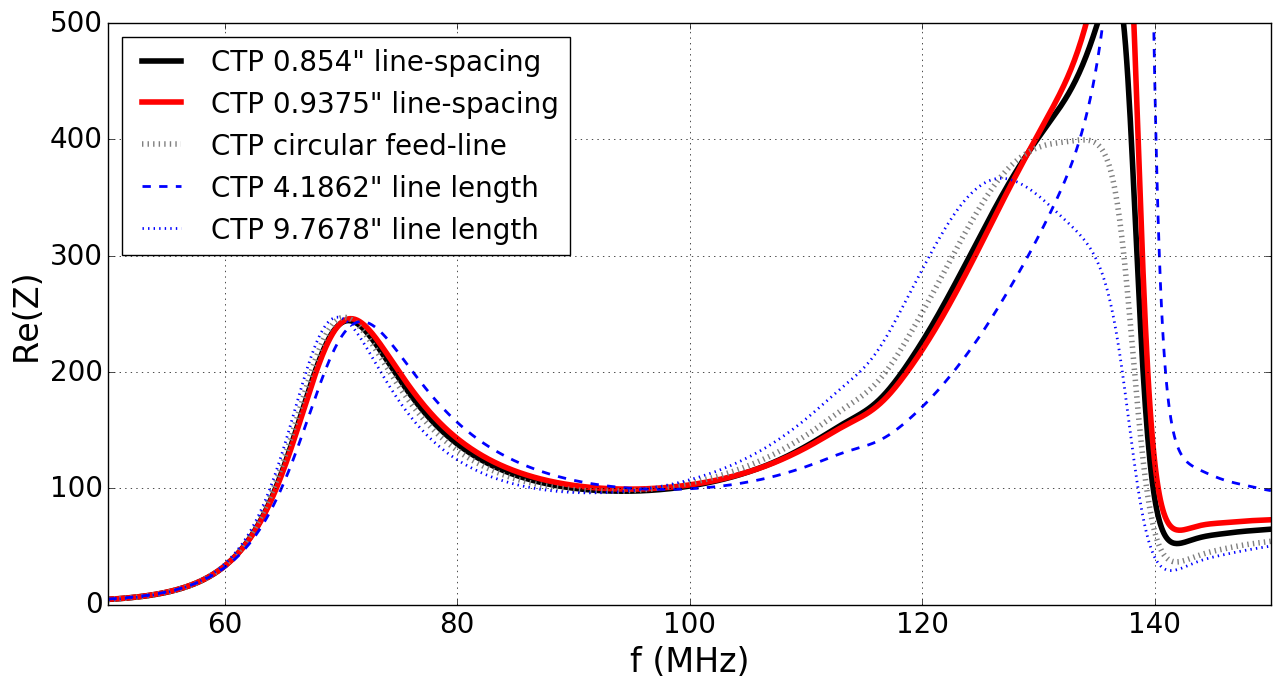

In [7]:
plt.plot(freqs,(np.real(z_CTP_spacing_0p854)),color='k',label='CTP 0.854" line-spacing',lw=4)
plt.plot(freqs,(np.real(z_CTP_spacing_0p9375)),color='r',ls='-',label='CTP 0.9375" line-spacing',lw=4)
plt.plot(freqs,(np.real(z_CTP_circular)),color='grey',ls=':',label='CTP circular feed-line',lw=4)
plt.plot(freqs,(np.real(z_CTP_length_4p1862)),color='b',ls='--',label='CTP 4.1862" line length',lw=2)
#plt.plot(freqs,10.*np.log10(np.abs(s11_CTP_length_6p977)),color='b',ls='-',label='CTP 6.977" line length',lw=2)
plt.plot(freqs,(np.real(z_CTP_length_9p7678)),color='b',ls=':',label='CTP 9.7678" line length',lw=2)





plt.legend(loc='best',fontsize=20)
plt.gca().tick_params(labelsize=20)
plt.xlim(50,150)
plt.ylim(0,500)
plt.gcf().set_size_inches(15,7.5)
plt.grid()
plt.gca().set_ylabel('Re(Z)',fontsize=24)
plt.gca().set_xlabel('f (MHz)',fontsize=24)
plt.savefig('../analysis/CTP_feedline_impedances_real.pdf')
#plt.plot(freqs,5.*np.log10(np.abs(s11CTP_Short_noGap_FeedOverDish)),color='k',ls=':',label='CTP Short Cylinder no Gap',lw=4)
#plt.plot(freqsHFSA,5.*np.log10(np.abs(s11HFSA)),color='r',label='Deployed High Frequency Feed',lw=4)

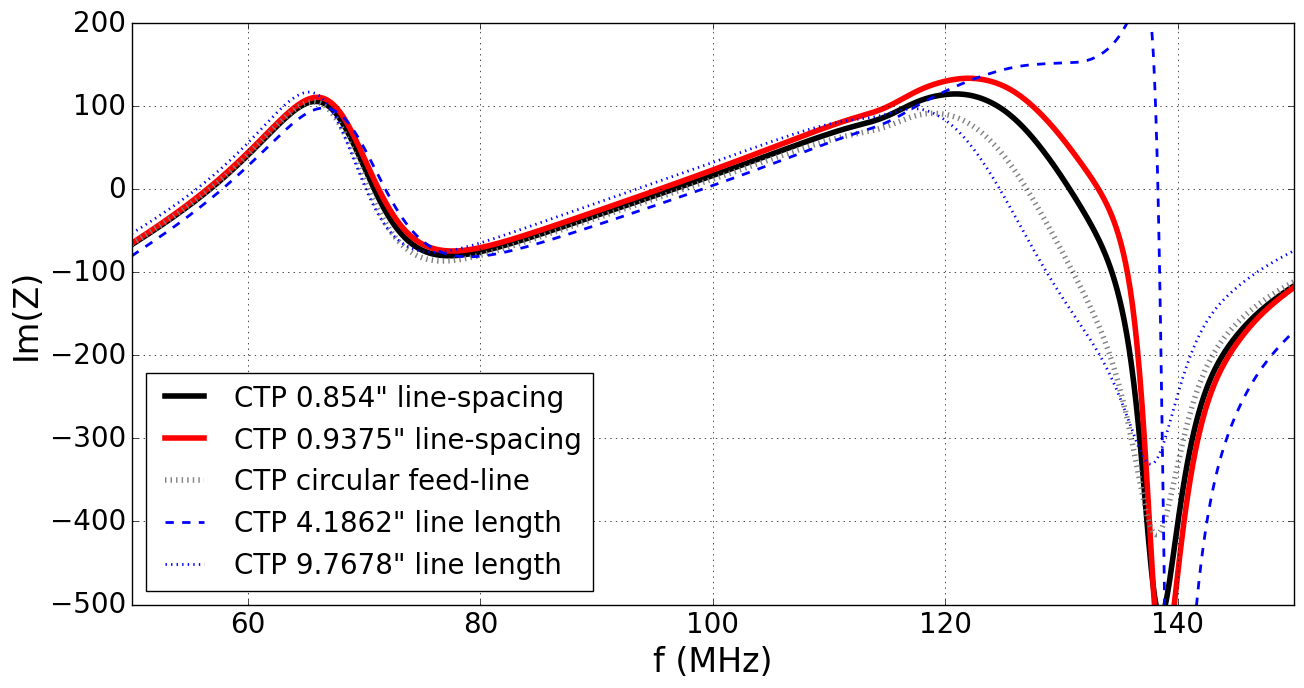

In [8]:
plt.plot(freqs,(np.imag(z_CTP_spacing_0p854)),color='k',label='CTP 0.854" line-spacing',lw=4)
plt.plot(freqs,(np.imag(z_CTP_spacing_0p9375)),color='r',ls='-',label='CTP 0.9375" line-spacing',lw=4)
plt.plot(freqs,(np.imag(z_CTP_circular)),color='grey',ls=':',label='CTP circular feed-line',lw=4)
plt.plot(freqs,(np.imag(z_CTP_length_4p1862)),color='b',ls='--',label='CTP 4.1862" line length',lw=2)
#plt.plot(freqs,10.*np.log10(np.abs(s11_CTP_length_6p977)),color='b',ls='-',label='CTP 6.977" line length',lw=2)
plt.plot(freqs,(np.imag(z_CTP_length_9p7678)),color='b',ls=':',label='CTP 9.7678" line length',lw=2)





plt.legend(loc='best',fontsize=20)
plt.gca().tick_params(labelsize=20)
plt.xlim(50,150)
plt.ylim(-500,200)
plt.gcf().set_size_inches(15,7.5)
plt.grid()
plt.gca().set_ylabel('Im(Z)',fontsize=24)
plt.gca().set_xlabel('f (MHz)',fontsize=24)
plt.savefig('../analysis/CTP_feedline_impedances_imag.pdf')


#plt.plot(freqs,5.*np.log10(np.abs(s11CTP_Short_noGap_FeedOverDish)),color='k',ls=':',label='CTP Short Cylinder no Gap',lw=4)
#plt.plot(freqsHFSA,5.*np.log10(np.abs(s11HFSA)),color='r',label='Deployed High Frequency Feed',lw=4)